In [1583]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error

In [1584]:
df=pd.read_csv("train.csv")

In [1585]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [1586]:
df.shape

(1238, 7)

In [1587]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [1588]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [1589]:
df["smoker"] = df["smoker"].replace("yes",1).replace("no",0)

In [1590]:
male_smokers=df["smoker"][df["sex"]=="male"].sum()*100/df["smoker"].sum()
male_smokers

56.854838709677416

In [1591]:
female_smokers=df["smoker"][df["sex"]=="female"].sum()*100/df["smoker"].sum()
female_smokers

43.145161290322584

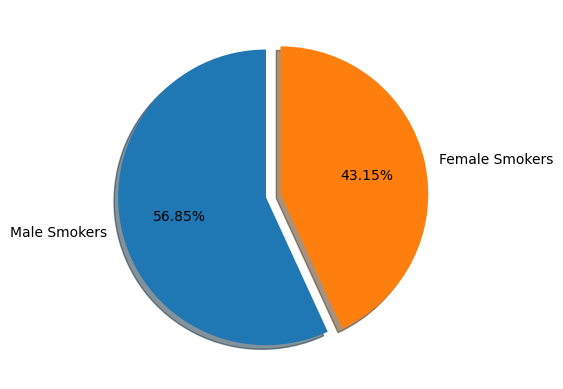

In [1592]:
plt.pie([male_smokers,female_smokers], explode=[0.1,0],autopct='%.2f%%',
        labels=["Male Smokers", "Female Smokers"], shadow=True, startangle=90);

In [1593]:
dummies = "gender"
encoding = pd.get_dummies(df["sex"], prefix=dummies)
df_ub = pd.concat([df, encoding], axis=1)

df_ub = df_ub.drop("sex", axis=1)
df_ub

,age,bmi,children,smoker,region,charges,gender_female,gender_male
0,19,27.900,0,1,southwest,16884.92400,1,0
1,18,33.770,1,0,southeast,1725.55230,0,1
2,28,33.000,3,0,southeast,4449.46200,0,1
3,33,22.705,0,0,northwest,21984.47061,0,1
4,32,28.880,0,0,northwest,3866.85520,0,1
...,...,...,...,...,...,...,...,...
1233,58,23.300,0,0,southwest,11345.51900,0,1
1234,45,27.830,2,0,southeast,8515.75870,1,0
1235,26,31.065,0,0,northwest,2699.56835,0,1
1236,63,21.660,0,0,northeast,14449.85440,1,0


In [1594]:
df_ub[df_ub["smoker"]==1]

,age,bmi,children,smoker,region,charges,gender_female,gender_male
0,19,27.900,0,1,southwest,16884.92400,1,0
11,62,26.290,0,1,southeast,27808.72510,1,0
14,27,42.130,0,1,southeast,39611.75770,0,1
19,30,35.300,0,1,southwest,36837.46700,0,1
23,34,31.920,1,1,northeast,37701.87680,1,0
...,...,...,...,...,...,...,...,...
1208,37,25.555,1,1,northeast,20296.86345,1,0
1218,46,34.600,1,1,southwest,41661.60200,1,0
1223,20,24.420,0,1,southeast,26125.67477,1,0
1230,52,34.485,3,1,northwest,60021.39897,0,1


In [1595]:
df_ub["smoker"].value_counts()

0    990
1    248
Name: smoker, dtype: int64

In [1596]:
df_ub["region"].value_counts()

southeast    339
northwest    303
northeast    300
southwest    296
Name: region, dtype: int64

In [1597]:
dummies = [1,2,3,4]
encoding = pd.get_dummies(df_ub["region"], prefix=dummies)
df_enc = pd.concat([df_ub, encoding], axis=1)

In [1598]:
df_enc

,age,bmi,children,smoker,region,charges,gender_female,gender_male,"[1, 2, 3, 4]_northeast","[1, 2, 3, 4]_northwest","[1, 2, 3, 4]_southeast","[1, 2, 3, 4]_southwest"
0,19,27.900,0,1,southwest,16884.92400,1,0,0,0,0,1
1,18,33.770,1,0,southeast,1725.55230,0,1,0,0,1,0
2,28,33.000,3,0,southeast,4449.46200,0,1,0,0,1,0
3,33,22.705,0,0,northwest,21984.47061,0,1,0,1,0,0
4,32,28.880,0,0,northwest,3866.85520,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1233,58,23.300,0,0,southwest,11345.51900,0,1,0,0,0,1
1234,45,27.830,2,0,southeast,8515.75870,1,0,0,0,1,0
1235,26,31.065,0,0,northwest,2699.56835,0,1,0,1,0,0
1236,63,21.660,0,0,northeast,14449.85440,1,0,1,0,0,0


In [1599]:
column_mapping = {'[1, 2, 3, 4]_northeast':'North-East',  '[1, 2, 3, 4]_northwest':'North-West', 
                   '[1, 2, 3, 4]_southeast':'South-East', '[1, 2, 3, 4]_southwest':'South-West'}
df_enc = df_enc.rename(columns=column_mapping)


In [1600]:
df_enc

,age,bmi,children,smoker,region,charges,gender_female,gender_male,North-East,North-West,South-East,South-West
0,19,27.900,0,1,southwest,16884.92400,1,0,0,0,0,1
1,18,33.770,1,0,southeast,1725.55230,0,1,0,0,1,0
2,28,33.000,3,0,southeast,4449.46200,0,1,0,0,1,0
3,33,22.705,0,0,northwest,21984.47061,0,1,0,1,0,0
4,32,28.880,0,0,northwest,3866.85520,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1233,58,23.300,0,0,southwest,11345.51900,0,1,0,0,0,1
1234,45,27.830,2,0,southeast,8515.75870,1,0,0,0,1,0
1235,26,31.065,0,0,northwest,2699.56835,0,1,0,1,0,0
1236,63,21.660,0,0,northeast,14449.85440,1,0,1,0,0,0


In [1601]:
df_enc=df_enc.drop("region", axis=1)

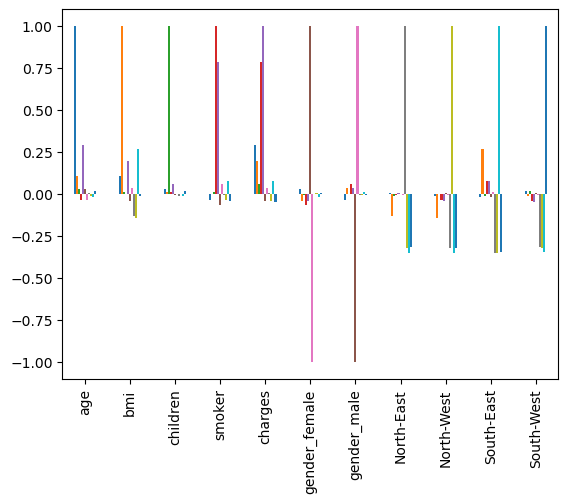

In [1602]:
df_enc.corr().plot.bar(legend=False);

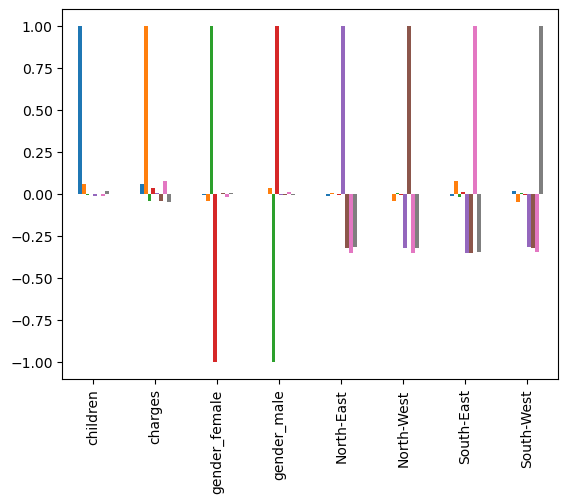

In [1603]:
df_enc.drop(["smoker","age", "bmi"],axis=1).corr().plot.bar(legend=False);

In [1604]:
df_enc["smoker"][df_enc["smoker"]==1].count()/(df_enc["smoker"][df_enc["smoker"]==1].count()+df_enc["smoker"][df_enc["smoker"]==0].count())


0.20032310177705978

In [1605]:
df_enc.dtypes

age                int64
bmi              float64
children           int64
smoker             int64
charges          float64
gender_female      uint8
gender_male        uint8
North-East         uint8
North-West         uint8
South-East         uint8
South-West         uint8
dtype: object

In [1606]:
print("Mean Charges in North-East:\n", df_enc[["charges"]][df_enc['North-East']==1].mean())
print("Mean Charges in North-West:\n", df_enc[["charges"]][df_enc['North-West']==1].mean())
print("Mean Charges in South-East:\n", df_enc[["charges"]][df_enc['South-East']==1].mean())
print("Mean Charges in South-West:\n", df_enc[["charges"]][df_enc['South-West']==1].mean())

Mean Charges in North-East:
 charges    13358.304345
dtype: float64
Mean Charges in North-West:
 charges    12431.886866
dtype: float64
Mean Charges in South-East:
 charges    14789.200089
dtype: float64
Mean Charges in South-West:
 charges    12237.806842
dtype: float64


In [1607]:
print("Mean BMI in North-East:\n", df_enc[["bmi"]][df_enc['North-East']==1].mean())
print("Mean BMI in North-West:\n", df_enc[["bmi"]][df_enc['North-West']==1].mean())
print("Mean BMI in South-East:\n", df_enc[["bmi"]][df_enc['South-East']==1].mean())
print("Mean BMI in South-West:\n", df_enc[["bmi"]][df_enc['South-West']==1].mean())

Mean BMI in North-East:
 bmi    29.33125
dtype: float64
Mean BMI in North-West:
 bmi    29.22896
dtype: float64
Mean BMI in South-East:
 bmi    33.404956
dtype: float64
Mean BMI in South-West:
 bmi    30.601351
dtype: float64


In [1608]:
print("Maximum Age in North-East:\n", df_enc[["age"]][df_enc['North-East']==1].max())
print("Maximum Age in North-West:\n", df_enc[["age"]][df_enc['North-West']==1].max())
print("Maximum Age in South-East:\n", df_enc[["age"]][df_enc['South-East']==1].max())
print("Maximum Age in South-West:\n", df_enc[["age"]][df_enc['South-West']==1].max())

Maximum Age in North-East:
 age    64
dtype: int64
Maximum Age in North-West:
 age    64
dtype: int64
Maximum Age in South-East:
 age    64
dtype: int64
Maximum Age in South-West:
 age    64
dtype: int64


In [1609]:
print("Total smokers in North-East:\n", df_enc[["smoker"]][df_enc['North-East']==1].sum())
print("Total smokers in North-West:\n", df_enc[["smoker"]][df_enc['North-West']==1].sum())
print("Total smokers in South-East:\n", df_enc[["smoker"]][df_enc['South-East']==1].sum())
print("Total smokers in South-West:\n", df_enc[["smoker"]][df_enc['South-West']==1].sum())

Total smokers in North-East:
 smoker    59
dtype: int64
Total smokers in North-West:
 smoker    53
dtype: int64
Total smokers in South-East:
 smoker    85
dtype: int64
Total smokers in South-West:
 smoker    51
dtype: int64


In [1610]:
df_enc["children"][df_enc["smoker"]==1].mean()

1.1209677419354838

In [1611]:
df_enc["children"][df_enc["smoker"]==0].mean()

1.0808080808080809

In [1612]:
#df_enc=df_enc.drop("children", axis=1)

In [1613]:
df_enc=df_enc[["age", "bmi", "smoker", "charges"]]

In [1614]:
df_enc[["age"]][df_enc["smoker"]==0].mean()

age    39.70202
dtype: float64

<Axes: >

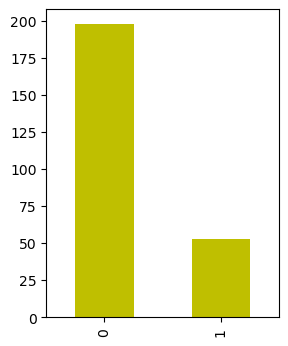

In [1615]:
df_enc["smoker"][df_enc["age"]<25].value_counts().plot.bar(figsize=(3, 4), color = "y")

<Axes: >

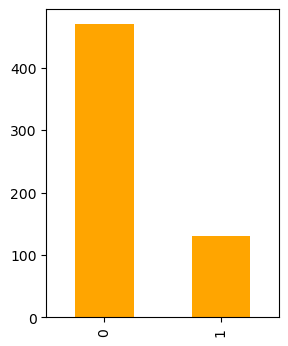

In [1616]:
df_enc["smoker"][df_enc["age"]>25][df_enc["age"]<50].value_counts().plot.bar(figsize=(3, 4), color="orange")

<Axes: >

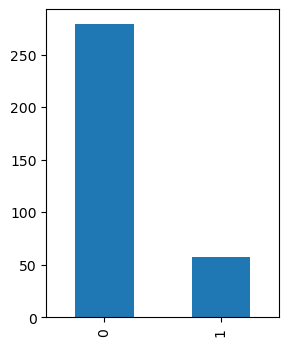

In [1617]:
df_enc["smoker"][df_enc["age"]>50].value_counts().plot.bar(figsize=(3, 4))

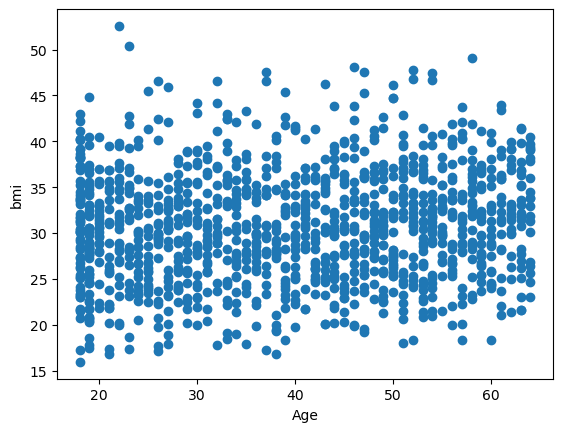

In [1618]:
plt.scatter(df_enc["age"], df_enc["bmi"])
plt.xlabel("Age")
plt.ylabel("bmi")
plt.show()

<Axes: >

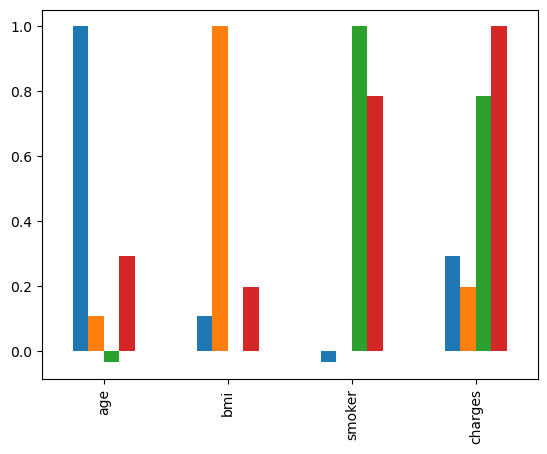

In [1619]:
df_enc.corr().plot.bar(legend=False)

In [1620]:
df_enc[["smoker", "charges"]].corr()

,smoker,charges
smoker,1.000000,0.785143
charges,0.785143,1.000000


In [1621]:
#average charges for smokers and non smokers

f=df_enc["charges"][df_enc["smoker"]==1].sum()
f

7956153.9023

In [1622]:
g=df_enc["charges"][df_enc["smoker"]==0].sum()
g

8454128.777159

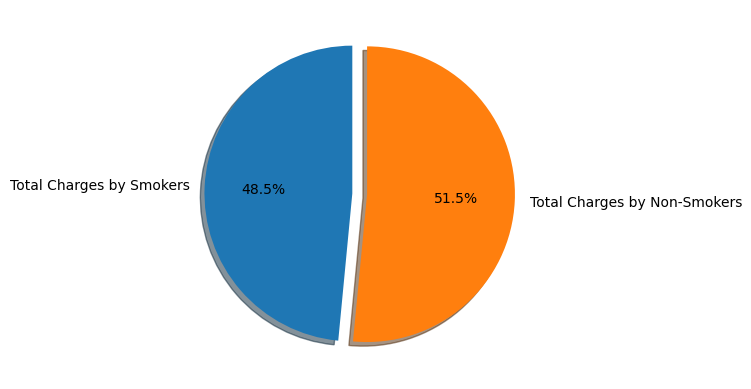

In [1623]:
plt.pie([f,g],labels= ["Total Charges by Smokers", "Total Charges by Non-Smokers"],
        explode=[0.1,0], shadow=True, autopct = "%.1f%%", startangle =90);

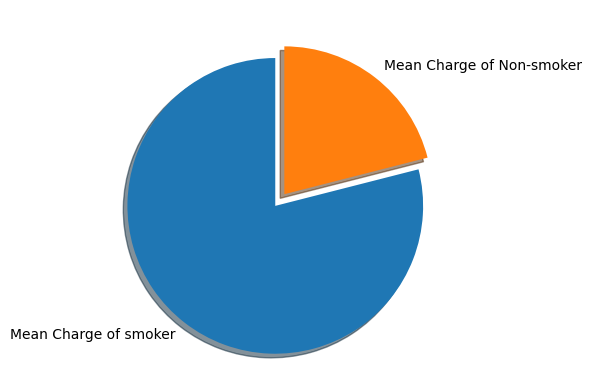

In [1624]:
f=df_enc["charges"][df_enc["smoker"]==1].mean()
g=df_enc["charges"][df_enc["smoker"]==0].mean()
plt.pie([f,g], labels=["Mean Charge of smoker", "Mean Charge of Non-smoker"],
       explode=[0.1,0], shadow=True, startangle =90)
plt.show()

In [1625]:
dummies = "smoker"
encoding = pd.get_dummies(df["smoker"], prefix=dummies)
df_enc = pd.concat([df_enc, encoding], axis=1)

df_enc = df_enc.drop("smoker", axis=1)
df_enc

,age,bmi,charges,smoker_0,smoker_1
0,19,27.900,16884.92400,0,1
1,18,33.770,1725.55230,1,0
2,28,33.000,4449.46200,1,0
3,33,22.705,21984.47061,1,0
4,32,28.880,3866.85520,1,0
...,...,...,...,...,...
1233,58,23.300,11345.51900,1,0
1234,45,27.830,8515.75870,1,0
1235,26,31.065,2699.56835,1,0
1236,63,21.660,14449.85440,1,0


In [1626]:
y = df_enc["charges"]
X = df_enc.drop("charges", axis=1)
X

,age,bmi,smoker_0,smoker_1
0,19,27.900,0,1
1,18,33.770,1,0
2,28,33.000,1,0
3,33,22.705,1,0
4,32,28.880,1,0
...,...,...,...,...
1233,58,23.300,1,0
1234,45,27.830,1,0
1235,26,31.065,1,0
1236,63,21.660,1,0


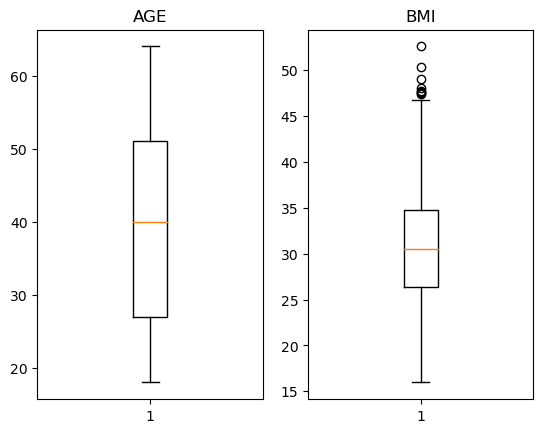

In [1627]:
fig,ax = plt.subplots(1,2)

ax[0].boxplot(X[["age"]])
ax[0].set_title("AGE")

ax[1].boxplot(X[["bmi"]])
ax[1].set_title("BMI")

plt.show()

In [1628]:
X["bmi"].max()

52.58

In [1629]:
mx = MinMaxScaler()
df_mx = mx.fit_transform(X)
X = pd.DataFrame(df_mx,columns=X.columns)
X = np.array(X)

## Non-Linear Regression

### Degree 2

In [1630]:
#Degree 2 Polynomial
poly_features = PolynomialFeatures(degree=2)
X_poly2 = poly_features.fit_transform(X)

### Degree 3

In [1631]:
#Degree 3 Polynomial
poly_features = PolynomialFeatures(degree=3)
X_poly3 = poly_features.fit_transform(X)

### Degree 4

In [1632]:
#Degree 3 Polynomial
poly_features = PolynomialFeatures(degree=4)
X_poly4 = poly_features.fit_transform(X)

## SGD

In [1633]:
sgd = SGDRegressor(eta0=1e-3, alpha =0.0001) # taking alpha as 0.0001

## KFOLD loop

In [1634]:

def SGDnonlinear(n):
    
    k=5
    kf = KFold(k)
    epochs=3000
    train_losses = np.zeros(epochs)
    val_losses = np.zeros(epochs)
    sgd = SGDRegressor(eta0=1e-3, alpha =0.0001)
    poly_features = PolynomialFeatures(degree=n)
    
    for train_i, val_i in kf.split(X):

        X_train_poly, X_val_poly = X[train_i], X[val_i]
        y_train, y_val = y[train_i], y[val_i]

        X_train = poly_features.fit_transform(X_train_poly)
        X_val = poly_features.fit_transform(X_val_poly)

        # Performed partial fit for multiple iterations
        for epoch in range(epochs):

            
            sgd.partial_fit(X_train, y_train)

            # Calculated training loss
            train_loss = np.mean((sgd.predict(X_train) - y_train)**2)
            train_losses[epoch]+=np.sqrt(train_loss)

            # Calculated validation loss
            val_loss = np.mean((sgd.predict(X_val) - y_val)**2)
            val_losses[epoch]+=(np.sqrt(val_loss))    

    # Dividing by k-splits
    train_losses/=k
    val_losses/=k

    print("RMSE training: ", train_losses[-1]) # -1--> last element of the array
    print("RMSE validation: ", val_losses[-1]) # -1--> last element of the array

    plt.plot(train_losses, label='Training Loss')
    plt.plot(val_losses, label='Testing Loss')
    plt.xlabel('Epochs')
    plt.ylabel(f'Root Mean Squared Error (RMSE){n}')
    plt.title('Loss Function over Training Epochs')
    plt.legend()
    plt.show()
    return sgd, poly_features # returns the model and polynomial instance

RMSE training:  6058.572703163198
RMSE validation:  6089.511654489148


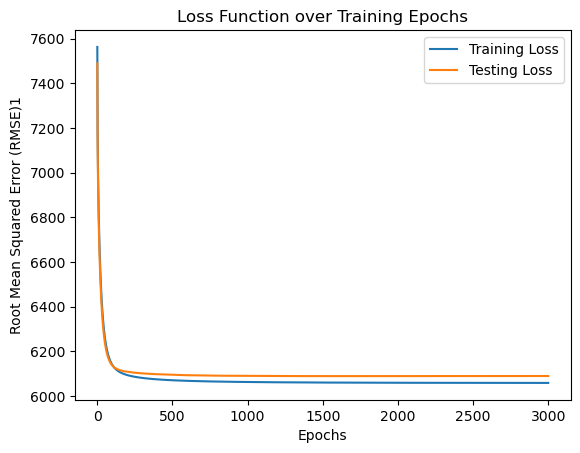

(SGDRegressor(eta0=0.001), PolynomialFeatures(degree=1))

In [1635]:
SGDnonlinear(1) # degree =1

RMSE training:  4957.644876453141
RMSE validation:  5002.701106690902


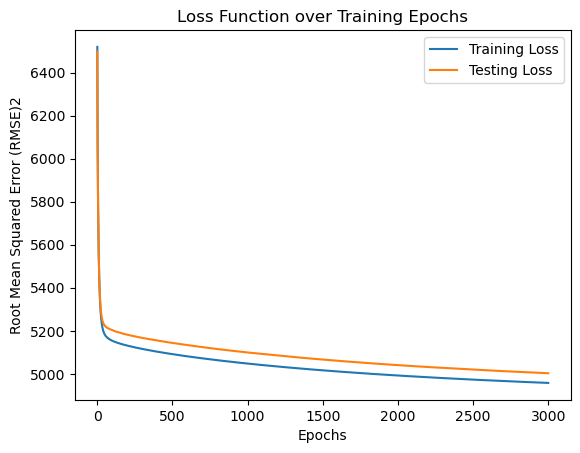

(SGDRegressor(eta0=0.001), PolynomialFeatures())

In [1636]:
SGDnonlinear(2) # degree = 2

RMSE training:  4870.237144130287
RMSE validation:  4899.327413313922


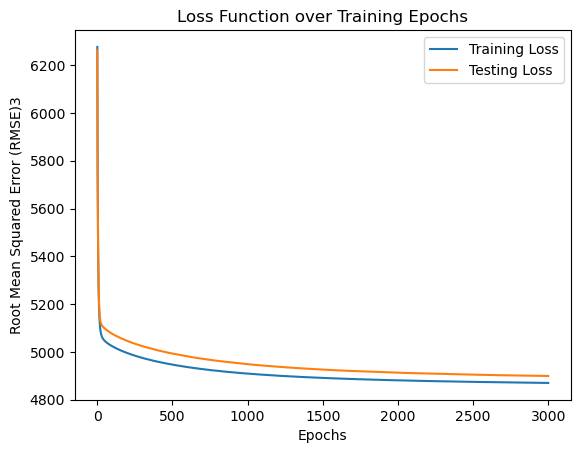

(SGDRegressor(eta0=0.001), PolynomialFeatures(degree=3))

In [1637]:
SGDnonlinear(3) #degree = 3

RMSE training:  4854.84586180381
RMSE validation:  4877.558751720962


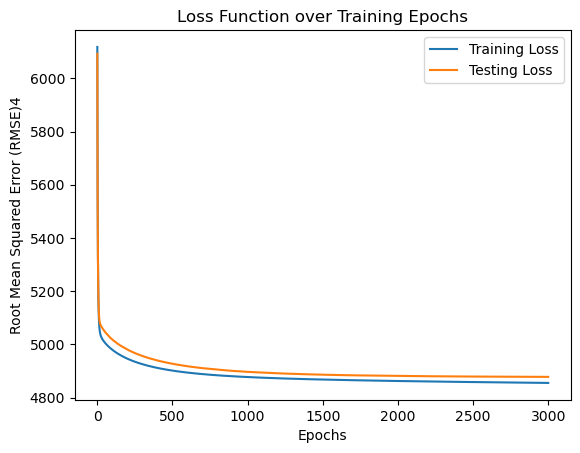

(SGDRegressor(eta0=0.001), PolynomialFeatures(degree=4))

In [1638]:
SGDnonlinear(4) # degree = 3

## Test

In [1639]:
df_test= pd.read_csv("test.csv")
df_test.head()

,age,sex,bmi,children,smoker,region,charges
0,37,male,22.705,3,no,northeast,NaN
1,25,female,42.130,1,no,southeast,NaN
2,52,male,41.800,2,yes,southeast,NaN
3,64,male,36.960,2,yes,southeast,NaN
4,22,female,21.280,3,no,northwest,NaN


In [1640]:
df_test.shape

(100, 7)

In [1641]:
# one-hot encoding for smokers
df_test["smoker"] = df_test["smoker"].replace("yes",1).replace("no",0)
dummies = "smoker"
encoding = pd.get_dummies(df_test["smoker"], prefix=dummies)
df_test = pd.concat([df_test, encoding], axis=1)
df_test = df_test.drop("smoker", axis=1)
df_test

,age,sex,bmi,children,region,charges,smoker_0,smoker_1
0,37,male,22.705,3,northeast,NaN,1,0
1,25,female,42.130,1,southeast,NaN,1,0
2,52,male,41.800,2,southeast,NaN,0,1
3,64,male,36.960,2,southeast,NaN,0,1
4,22,female,21.280,3,northwest,NaN,1,0
...,...,...,...,...,...,...,...,...
95,50,male,30.970,3,northwest,NaN,1,0
96,18,female,31.920,0,northeast,NaN,1,0
97,18,female,36.850,0,southeast,NaN,1,0
98,21,female,25.800,0,southwest,NaN,1,0


In [1642]:
df_test_enc = df_test[["age", "bmi", "smoker_0","smoker_1"]]

In [1643]:
sct = MinMaxScaler()
df_test_scaler = sct.fit_transform(df_test_enc)
test_X = pd.DataFrame(df_test_scaler, columns = df_test_enc.columns)

In [1644]:
test_X = pd.DataFrame(df_test_scaler, columns = df_test_enc.columns)

In [1645]:
test_X.head()

,age,bmi,smoker_0,smoker_1
0,0.413043,0.151088,1.0,0.0
1,0.152174,0.693080,1.0,0.0
2,0.739130,0.683873,0.0,1.0
3,1.000000,0.548828,0.0,1.0
4,0.086957,0.111328,1.0,0.0


RMSE training:  4854.87214898196
RMSE validation:  4877.568668174822


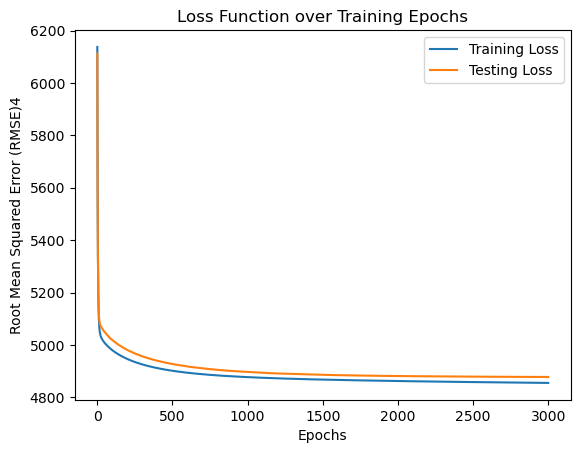

In [1646]:
sgd, poly_features = SGDnonlinear(4)

In [1647]:
X_test_poly = poly_features.fit_transform(test_X)
pred = sgd.predict(X_test_poly)

In [1648]:
df_test['charges']=pred
df_test

,age,sex,bmi,children,region,charges,smoker_0,smoker_1
0,37,male,22.705,3,northeast,6704.349344,1,0
1,25,female,42.130,1,southeast,4120.683200,1,0
2,52,male,41.800,2,southeast,51426.441258,0,1
3,64,male,36.960,2,southeast,47809.016727,0,1
4,22,female,21.280,3,northwest,3157.051889,1,0
...,...,...,...,...,...,...,...,...
95,50,male,30.970,3,northwest,11306.496389,1,0
96,18,female,31.920,0,northeast,3358.629389,1,0
97,18,female,36.850,0,southeast,3364.938139,1,0
98,21,female,25.800,0,southwest,3465.295952,1,0


In [1649]:
price_new_emp=df_test["charges"].sum()
price_new_emp

1298462.8289454156

In [1650]:
price_old_emp=df["charges"].sum()
price_old_emp

16410282.679459

In [1651]:
total_price_pred= price_new_emp + price_old_emp
total_price_pred

17708745.508404415

In [1652]:
total_price = 17755825

In [1653]:
price_dif=total_price-total_price_pred
price_dif

47079.4915955849

In [1654]:
price_dif/1338 # employees

35.18646606545956

## 47,263.91 Euros Insurance company is asking more